Reading in: C:/Users/huihu/Documents/TFG_Física/MIST_2,3,4,5,6,8,10,12,18\0020000M.track.eep.cmd
Reading in: C:/Users/huihu/Documents/TFG_Física/MIST_2,3,4,5,6,8,10,12,18\0030000M.track.eep.cmd
Reading in: C:/Users/huihu/Documents/TFG_Física/MIST_2,3,4,5,6,8,10,12,18\0040000M.track.eep.cmd
Reading in: C:/Users/huihu/Documents/TFG_Física/MIST_2,3,4,5,6,8,10,12,18\0050000M.track.eep.cmd
Reading in: C:/Users/huihu/Documents/TFG_Física/MIST_2,3,4,5,6,8,10,12,18\0060000M.track.eep.cmd
Reading in: C:/Users/huihu/Documents/TFG_Física/MIST_2,3,4,5,6,8,10,12,18\0080000M.track.eep.cmd
Reading in: C:/Users/huihu/Documents/TFG_Física/MIST_2,3,4,5,6,8,10,12,18\0100000M.track.eep.cmd
Reading in: C:/Users/huihu/Documents/TFG_Física/MIST_2,3,4,5,6,8,10,12,18\0120000M.track.eep.cmd
Reading in: C:/Users/huihu/Documents/TFG_Física/MIST_2,3,4,5,6,8,10,12,18\0180000M.track.eep.cmd


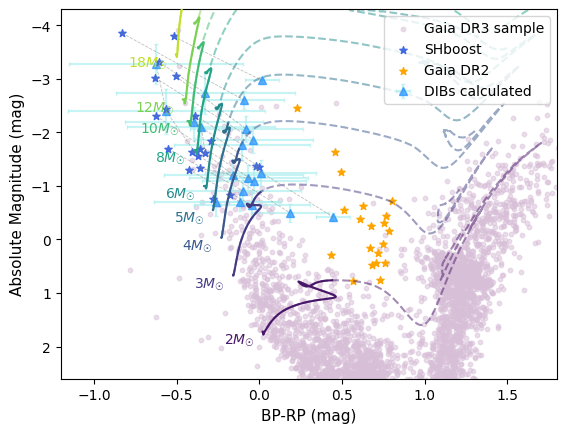

In [23]:
import glob
import os
import pandas as pd
import numpy as np
import read_mist_models
from read_mist_models import EEPCMD
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

sample_file=os.path.join("C:/Users/huihu/Documents/TFG_Física/GaiaDR3_sample.csv")
gaiadr2_position='C:/Users/huihu/Documents/TFG_Física/GaiaDR2_magnitudes.csv' 
sources_file=os.path.join("C:/Users/huihu/Documents/TFG_Física/Data_sources_HRdiagram.csv")
ev_tracks = 'C:/Users/huihu/Documents/TFG_Física/MIST_2,3,4,5,6,8,10,12,18'  

df=pd.read_csv(sample_file, delimiter=";")
sample_bprp0=df.iloc[:, 1]  
sample_mg0= df.iloc[:, 2]
df=pd.read_csv(sources_file, delimiter=";")
bprp0=df.iloc[:, 2]
mg0=df.iloc[:, 3]
bprp0 = bprp0.head(20)
mg0 = mg0.head(20)

#Magnitudes with extinction calculated from spectrum
bprp1=df.iloc[:, 19]
mg1=df.iloc[:, 20]
bprp1_err = np.sqrt(df.iloc[:, 22]**2+df.iloc[:, 23]**2)
mg1_err = df.iloc[:, 21]

#Previous position on CMD diagram
df=pd.read_csv(gaiadr2_position, delimiter=";")
gaiadr2_bprp=df.iloc[:, 8]
gaiadr2_mg=df.iloc[:, 5]

plt.scatter(sample_bprp0, sample_mg0, label='Gaia DR3 sample', s=10, color="thistle", alpha=0.5)
plt.scatter(bprp0, mg0, label='SHboost', s=30, marker="*", color="royalblue", zorder=2)
plt.scatter(gaiadr2_bprp, gaiadr2_mg, label='Gaia DR2', s=30, marker="*", color="orange")
plt.errorbar(bprp1, mg1, xerr=bprp1_err, yerr=mg1_err,
             fmt='^', label='DIBs calculated', markersize=5.5, color="dodgerblue", ecolor='paleturquoise', capsize=1.5, alpha=0.7, zorder=1)


#Evolution tracks
cmap=matplotlib.colormaps['viridis']
index=15
masses=[2,3,4,5,6,8,10,12,18]
j=0
for filename in os.listdir(ev_tracks):
    if filename.endswith('.track.eep.cmd'):
        full_path = os.path.join(ev_tracks, filename)
    
        eepcmd = read_mist_models.EEPCMD(full_path)
        d = eepcmd.eepcmds
        
        mask_ms = (d['phase'] < 2) & (d['phase'] > -1)
        color_ms = d[mask_ms]['Gaia_BP_EDR3'] - d[mask_ms]['Gaia_RP_EDR3']
        mag_ms = d[mask_ms]['Gaia_G_EDR3']
        plt.plot(color_ms, mag_ms, color=cmap(index), linestyle='-', alpha=1, zorder=3)
        min_color_index = color_ms.argmin()
        x_text = color_ms[min_color_index]
        y_text = mag_ms[min_color_index]
        plt.text(x_text - 0.05, y_text, f'{masses[j]}$M_☉$', color=cmap(index), va='top', ha='right', fontsize=10, zorder=3)
        j+=1
        
        mask = (d['phase'] < 4) & (d['phase'] > -1)
        color = d[mask]['Gaia_BP_EDR3'] - d[mask]['Gaia_RP_EDR3']
        mag = d[mask]['Gaia_G_EDR3']
        plt.plot(color, mag, color=cmap(index), linestyle='--', alpha=0.5)
        
        index+=27
        
#Lines from EW-calculated position to SHboost position
for i in range(len(bprp0)):
    x = [bprp0.iloc[i], bprp1.iloc[i]]
    y = [mg0.iloc[i], mg1.iloc[i]]
    plt.plot(x, y, color='gray', linestyle='--', linewidth=0.6, alpha=0.5)

plt.legend(loc='upper right', fontsize=10, handletextpad=0.5)
plt.xlabel("BP-RP (mag)", fontsize=11)
plt.gca().invert_yaxis()
plt.ylabel("Absolute Magnitude (mag)", fontsize=11)
plt.xlim(-1.2, 1.8)
plt.ylim(2.6, -4.3)
plt.savefig('C:/Users/huihu/Documents/TFG_Física/CMD.png', dpi=200) 